In [1]:
import pandas as pd
from pystan import StanModel
import pickle

In [25]:
loserwinner = pd.read_csv('output/data_kaimei.csv', index_col=0)

In [26]:
loserwinner = loserwinner.reset_index(drop=True)

In [27]:
loserwinner

,loser,winner,year,month,day
0,隆乃若,武蔵丸,2001,1,1
1,栃乃洋,貴乃花,2001,1,1
2,魁皇,若の里,2001,1,1
3,琴光喜,千代大海,2001,1,1
4,出島,貴ノ浪,2001,1,1
5,栃栄,雅山,2001,1,1
6,琴ノ若,武双山,2001,1,1
7,海鵬,和歌乃山,2001,1,1
8,栃東,安芸乃島,2001,1,1
9,土佐ノ海,玉春日,2001,1,1


In [28]:
len(loserwinner['loser'].unique())

205

In [29]:
len(loserwinner['loser'].value_counts()[loserwinner['loser'].value_counts()<10])

14

In [30]:
len(loserwinner['winner'].value_counts()[loserwinner['winner'].value_counts()<10])

28

In [31]:
rare_rikishies = []
rare_rikishies.append(loserwinner['loser'].value_counts()[loserwinner['loser'].value_counts()<10].index)
rare_rikishies.append(loserwinner['winner'].value_counts()[loserwinner['winner'].value_counts()<10].index)
rare_rikishies = [rare_rikishi for loser_winner in rare_rikishies for rare_rikishi in loser_winner]

In [32]:
for rare_rikishi in rare_rikishies:
    loserwinner = loserwinner[loserwinner['loser'] != rare_rikishi]
    loserwinner = loserwinner[loserwinner['winner'] != rare_rikishi]
loserwinner = loserwinner.reset_index(drop=True)

In [33]:
loserwinner

,loser,winner,year,month,day
0,隆乃若,武蔵丸,2001,1,1
1,栃乃洋,貴乃花,2001,1,1
2,魁皇,若の里,2001,1,1
3,琴光喜,千代大海,2001,1,1
4,出島,貴ノ浪,2001,1,1
5,栃栄,雅山,2001,1,1
6,琴ノ若,武双山,2001,1,1
7,海鵬,和歌乃山,2001,1,1
8,栃東,安芸乃島,2001,1,1
9,土佐ノ海,玉春日,2001,1,1


In [34]:
len(loserwinner['loser'].unique())

177

In [35]:
len(loserwinner['winner'].unique())

177

In [36]:
rikishi_id = dict(zip(loserwinner['loser'].unique(), range(1, len(loserwinner['loser'].unique())+1)))

In [37]:
rikishi_id

{'よう司': 67,
 '五城楼': 60,
 '佐田の富士': 122,
 '佐田の海': 154,
 '光法': 50,
 '光龍': 103,
 '出島': 5,
 '勢': 138,
 '北勝力': 58,
 '北勝富士': 169,
 '北太樹': 106,
 '北桜': 48,
 '十文字': 38,
 '千代の国': 137,
 '千代丸': 153,
 '千代大海': 31,
 '千代大龍': 140,
 '千代天山': 24,
 '千代白鵬': 108,
 '千代皇': 152,
 '千代翔馬': 166,
 '千代鳳': 144,
 '和歌乃山': 19,
 '嘉風': 87,
 '土佐ノ海': 10,
 '土佐豊': 115,
 '垣添': 69,
 '大善': 28,
 '大奄美': 175,
 '大栄翔': 161,
 '大砂嵐': 150,
 '大碇': 53,
 '大翔丸': 164,
 '大至': 17,
 '大道': 125,
 '天鎧鵬': 135,
 '妙義龍': 133,
 '宇良': 167,
 '安壮富士': 82,
 '安美錦': 44,
 '安芸乃島': 22,
 '宝富士': 123,
 '富士東': 127,
 '寶智山': 91,
 '寺尾': 37,
 '将司': 96,
 '小城錦': 15,
 '山本山': 112,
 '岩木山': 61,
 '常幸龍': 142,
 '御嶽海': 162,
 '徳勝龍': 146,
 '徳瀬川': 119,
 '把瑠都': 89,
 '日馬富士': 78,
 '旭大星': 173,
 '旭天鵬': 35,
 '旭日松': 139,
 '旭秀鵬': 136,
 '旭鷲山': 14,
 '春ノ山': 49,
 '春日王': 64,
 '春日錦': 63,
 '時天空': 75,
 '時津海': 34,
 '普天王': 71,
 '朝乃山': 174,
 '朝乃若': 32,
 '朝赤龍': 66,
 '朝青竜': 36,
 '朝青龍': 54,
 '木村山': 107,
 '東龍': 145,
 '松鳳山': 132,
 '栃ノ心': 104,
 '栃乃洋': 2,
 '栃乃花': 11,
 '栃乃若': 128,
 '栃東': 9,
 '栃栄': 6,
 '栃煌山': 9

In [38]:
loserwinner = loserwinner.replace(rikishi_id)

In [39]:
loserwinner

,loser,winner,year,month,day
0,1,40,2001,1,1
1,2,41,2001,1,1
2,3,21,2001,1,1
3,4,31,2001,1,1
4,5,20,2001,1,1
5,6,29,2001,1,1
6,7,30,2001,1,1
7,8,19,2001,1,1
8,9,22,2001,1,1
9,10,23,2001,1,1


In [40]:
loserwinner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30383 entries, 0 to 30382
Data columns (total 5 columns):
loser     30383 non-null int64
winner    30383 non-null int64
year      30383 non-null int64
month     30383 non-null int64
day       30383 non-null int64
dtypes: int64(5)
memory usage: 1.2 MB


In [41]:
loserwinner['loser'].min()

1

In [42]:
loserwinner['loser'].max()

177

In [43]:
N = loserwinner['loser'].max()
M = loserwinner.shape[0]
Id = list(loserwinner[['loser', 'winner']].values)

data = dict(
    N=N,
    M=M,
    Id=Id
)

In [44]:
model = '''
data {
    int N;
    int M;
    int<lower=1, upper=N> Id[M, 2];
}

parameters {
    vector[N] strength;
    real<lower=0> s_strength;
    vector<lower=0>[N] stability;
    ordered[2] performance[M];
}

model {
    strength ~ normal(0, s_strength);
    stability ~ gamma(10, 10);
    for (i in 1:M)
        for (j in 1:2)
            performance[i, j] ~ student_t(1, strength[Id[i, j]], stability[Id[i, j]]);
}
'''

In [45]:
#fit = pystan.stan(model_code=model, data=data, chains=3, iter=400, warmup=50, thin=1)
# Elapsed Time: 502.752 seconds (Warm-up)
#               4065.26 seconds (Sampling)
#               4568.01 seconds (Total)

In [46]:
stanmodel = StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_812741a615284f9bb8cf0f4abe725c9c NOW.


In [47]:
fit = stanmodel.vb(data=data, seed=1234)
#234s

In [67]:
with open('2001to2018_advi_modelresult.pkl', 'wb') as f:
    pickle.dump(stanmodel, f)
    pickle.dump(fit, f)

In [49]:
vb_sample = pd.read_csv(fit['args']['sample_file'].decode('utf-8'), comment='#')
vb_sample = vb_sample.drop([0,1])

In [50]:
strength = vb_sample.filter(regex='strength\.\d+')

In [51]:
stability = vb_sample.filter(regex='stability\.\d+')

In [114]:
rikishi_df = pd.DataFrame(index=range(1, len(rikishi_id)+1), columns=['strength', 'stability'])

In [115]:
rikishi_df['id'] = rikishi_df.index

In [116]:
rikishi_df['strength'] = np.mean(strength).values
rikishi_df['stability'] = np.mean(stability).values

In [117]:
#rikishi_df

In [118]:
rikishi_df = rikishi_df.sort_values(by='strength', ascending=False)

In [119]:
rikishi_df['rank'] = range(1, len(rikishi_df)+1)

In [120]:
#rikishi_df

In [121]:
rikishi_id_inverse = dict(zip(rikishi_id.values(), rikishi_id.keys()))

In [122]:
rikishi_df.index = rikishi_df['id'].replace(rikishi_id_inverse).values

In [123]:
#rikishi_df

In [124]:
geneki = ['鶴竜', '白鵬', '稀勢の里', '豪栄道', '高安', '栃ノ心', '御嶽海', '逸ノ城', '玉鷲',
          '貴景勝', '勢', '魁聖', '豊山', '千代大龍', '正代', '遠藤', '千代の国', '阿炎', '妙義龍',
          '朝乃山', '輝', '阿武咲', '松鳳山', '栃煌山', '宝富士', '琴奨菊', '北勝富士', '大翔丸',
          '碧山', '大栄翔', '佐田の海', '旭大星', '隠岐の海', '錦木', '竜電', '貴ノ岩', '隆の勝',
          '千代丸', '千代翔馬', '嘉風', '琴勇輝', '石浦']

In [125]:
rikishi_df['geneki'] = rikishi_df.index.isin(geneki)

In [93]:
#rikishi_df

In [94]:
rikishi_df.sort_values(by='strength', ascending=False)

,strength,stability,id,rank,gentki
白鵬,6.402681,4.093895,74,1,True
朝青龍,5.341722,3.542797,54,2,False
日馬富士,2.913090,2.691690,78,3,False
武蔵丸,2.752508,2.141043,40,4,False
貴乃花,2.444162,1.881810,41,5,False
栃東,2.426451,2.376684,9,6,False
把瑠都,2.417341,2.412205,89,7,False
魁皇,2.307506,2.446961,3,8,False
稀勢の里,2.261019,2.666681,79,9,True
鶴竜,2.249714,2.541361,93,10,True


In [95]:
rikishi_df.sort_values(by='strength', ascending=False)

,strength,stability,id,rank,gentki
白鵬,6.402681,4.093895,74,1,True
朝青龍,5.341722,3.542797,54,2,False
日馬富士,2.913090,2.691690,78,3,False
武蔵丸,2.752508,2.141043,40,4,False
貴乃花,2.444162,1.881810,41,5,False
栃東,2.426451,2.376684,9,6,False
把瑠都,2.417341,2.412205,89,7,False
魁皇,2.307506,2.446961,3,8,False
稀勢の里,2.261019,2.666681,79,9,True
鶴竜,2.249714,2.541361,93,10,True


In [149]:
rikishi_df = rikishi_df.drop('琴欧洲', axis=0)

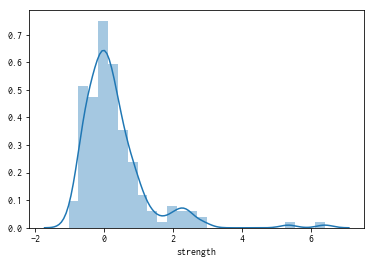

In [96]:
sns.distplot(rikishi_df['strength'])

In [97]:
rikishi_df.sort_values(by='stability', ascending=False)

,strength,stability,id,rank,gentki
白鵬,6.402681,4.093895,74,1,True
朝青龍,5.341722,3.542797,54,2,False
日馬富士,2.913090,2.691690,78,3,False
稀勢の里,2.261019,2.666681,79,9,True
鶴竜,2.249714,2.541361,93,10,True
琴欧洲,2.063120,2.504566,94,12,False
魁皇,2.307506,2.446961,3,8,False
把瑠都,2.417341,2.412205,89,7,False
千代大海,2.094122,2.379473,31,11,False
栃東,2.426451,2.376684,9,6,False


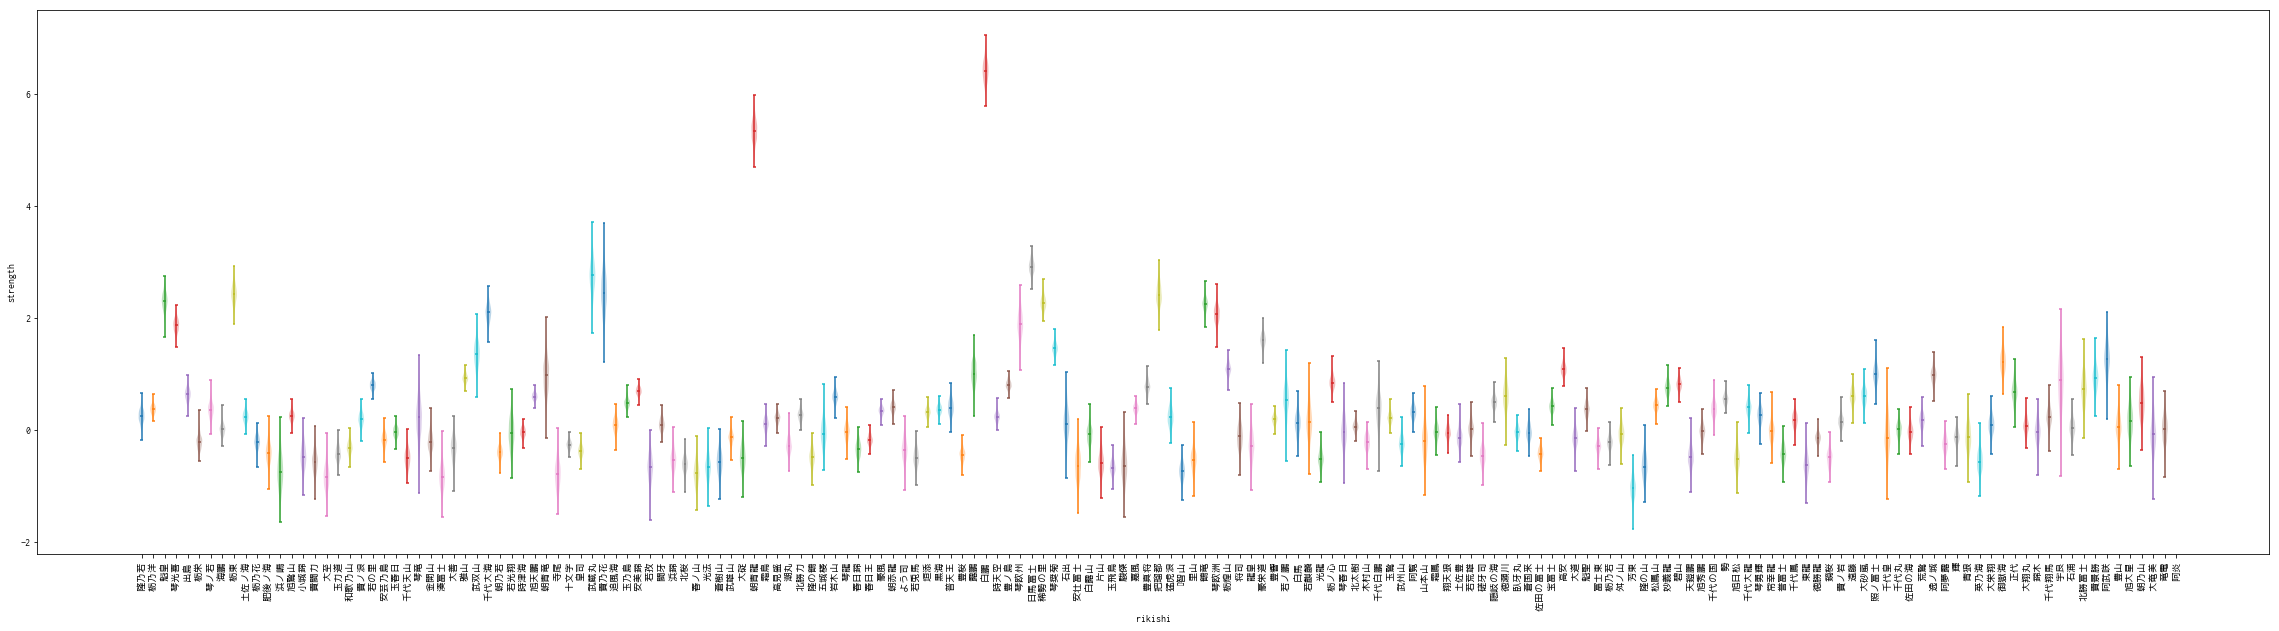

In [150]:
plt.figure(figsize=(40,10))
cmap = plt.cm.get_cmap('tab10')

for i in range(len(rikishi_df)):
    g = plt.violinplot(strength.iloc[:, i], positions=[i], showmeans=False, showextrema=True, showmedians=True)
    c = cmap(i%10)
    for pc in g['bodies']:
        pc.set_facecolor(c)
    g['cbars'].set_edgecolor(c)
    g['cmaxes'].set_edgecolor(c)
    g['cmedians'].set_edgecolor(c)
    g['cmins'].set_edgecolor(c)

plt.xticks(list(range(len(rikishi_id.keys()))), rikishi_id.keys())
plt.xticks(rotation=90)

plt.xlabel('rikishi')
plt.ylabel('strength')
plt.savefig('output/rikishi_bayes_2001to2018_advi', dpi=200)
plt.show()

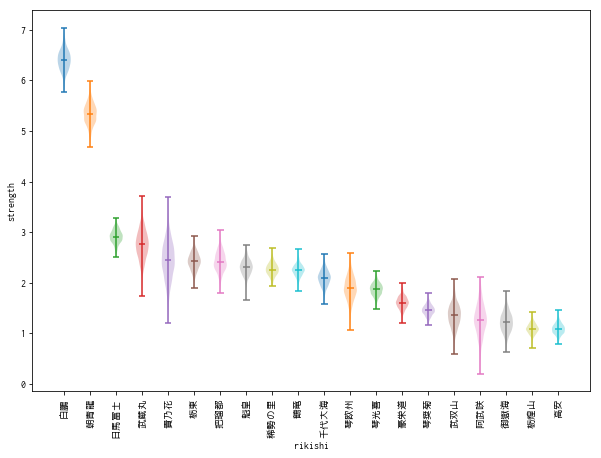

In [151]:
#上位20人
plt.figure(figsize=(10,7))
cmap = plt.cm.get_cmap('tab10')

for i in range(20):
    j = rikishi_df['id'][i]-1
    g = plt.violinplot(strength.iloc[:, j], positions=[i], showmeans=False, showextrema=True, showmedians=True)
    c = cmap(i%10)
    for pc in g['bodies']:
        pc.set_facecolor(c)
    g['cbars'].set_edgecolor(c)
    g['cmaxes'].set_edgecolor(c)
    g['cmedians'].set_edgecolor(c)
    g['cmins'].set_edgecolor(c)

plt.xticks(list(range(20)), rikishi_df.index)
plt.xticks(rotation=90)

plt.xlabel('rikishi')
plt.ylabel('strength')
plt.savefig('output/rikishi_bayes_2001to2018_advi_20', dpi=200)
plt.show()

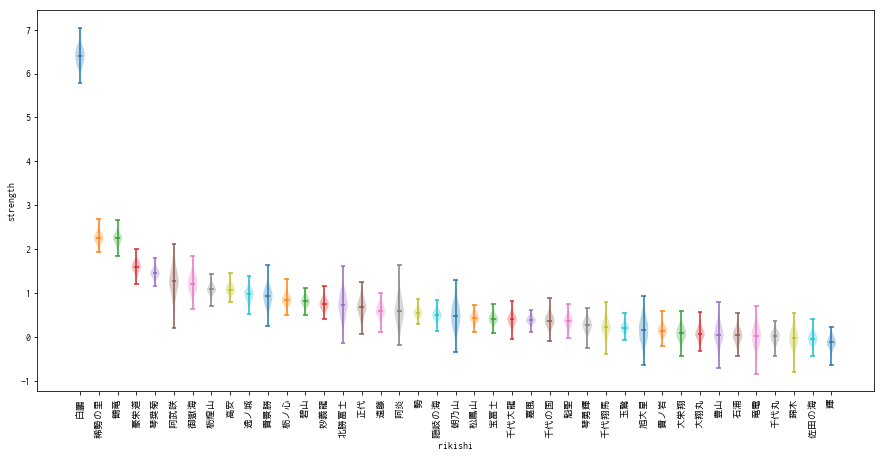

In [152]:
#現役
plt.figure(figsize=(15,7))
cmap = plt.cm.get_cmap('tab10')

for i in range(len(geneki)-1): #-1は、取り組み数が少なくて除いた力士を除くため
    j = rikishi_df[rikishi_df['geneki'] == True]['id'][i]-1
    g = plt.violinplot(strength.iloc[:, j], positions=[i], showmeans=False, showextrema=True, showmedians=True)
    c = cmap(i%10)
    for pc in g['bodies']:
        pc.set_facecolor(c)
    g['cbars'].set_edgecolor(c)
    g['cmaxes'].set_edgecolor(c)
    g['cmedians'].set_edgecolor(c)
    g['cmins'].set_edgecolor(c)

plt.xticks(list(range(len(geneki)-1)), rikishi_df[rikishi_df['geneki'] == True].index)
plt.xticks(rotation=90)

plt.xlabel('rikishi')
plt.ylabel('strength')
plt.savefig('output/rikishi_bayes_2001to2018_advi_geneki', dpi=200)
plt.show()